In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import tensorflow as tf

# Import Database

In [ ]:
movie_titles_df=pd.read_csv('/content/movie.csv')

In [ ]:
movie_titles_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_titles_df.tail()

,movieId,title,genres
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)
27277,131262,Innocence (2014),Adventure|Fantasy|Horror


In [ ]:
movie_rating_df = pd.read_csv(r'/content/rating.csv')


In [ ]:
movie_rating_df.head()


,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
movie_rating_df.tail()

,userId,movieId,rating,timestamp
1728717,11702,420,2.5,2006-05-21 11:39:37
1728718,11702,1080,5.0,2006-05-21 11:39:12
1728719,11702,1088,0.5,2006-05-21 11:42:09
1728720,11702,1220,4.5,2006-05-21 11:56:12
1728721,11702,1466,4.5,2006-05-21 11:


In [ ]:
movie_rating_df.drop(['timestamp'],axis=1, inplace= True)

In [ ]:
movie_rating_df

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
1728717,11702,420,2.5
1728718,11702,1080,5.0
1728719,11702,1088,0.5
1728720,11702,1220,4.5


In [ ]:
movie_rating_df.describe()

,userId,movieId,rating
count,1.728722e+06,1.728722e+06,1.728722e+06
mean,5.845235e+03,8.678311e+03,3.521062e+00
std,3.379097e+03,1.916859e+04,1.050523e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,2.935000e+03,9.040000e+02,3.000000e+00
50%,5.778000e+03,2.153000e+03,3.500000e+00
75%,8.829000e+03,4.641000e+03,4.000000e+00
max,1.170200e+04,1.307680e+05,5.000000e+00


In [ ]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728722 entries, 0 to 1728721
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 39.6 MB


In [ ]:
movie_rating_df = pd.merge(movie_rating_df,movie_titles_df, on = 'movieId')

In [ ]:
movie_rating_df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

# Visualize Dataset

In [ ]:
movie_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
$ (Dollars) (1971),1.0,2.500000,NaN,2.5,2.500,2.50,2.500,2.5
$5 a Day (2008),6.0,3.000000,0.836660,1.5,3.000,3.00,3.375,4.0
$9.99 (2008),2.0,4.250000,0.353553,4.0,4.125,4.25,4.375,4.5
'71 (2014),4.0,3.250000,0.288675,3.0,3.000,3.25,3.500,3.5
'Hellboy': The Seeds of Creation (2004),4.0,3.125000,0.750000,2.5,2.500,3.00,3.625,4.0
...,...,...,...,...,...,...,...,...
xXx: State of the Union (2005),64.0,2.398438,1.141496,0.5,1.500,2.50,3.000,5.0
¡Three Amigos! (1986),577.0,3.072790,0.991231,0.5,2.500,3.00,4.000,5.0
À l'aventure (2008),1.0,1.000000,NaN,1.0,1.000,1.00,1.000,1.0


In [ ]:
ratings_df_mean = movie_rating_df.groupby('title')['rating'].describe()['mean']

In [ ]:
ratings_df_count = movie_rating_df.groupby('title')['rating'].describe()['count']

In [ ]:
ratings_mean_count_df = pd.concat([ratings_df_count,ratings_df_mean],axis=1)

In [ ]:
ratings_mean_count_df

,count,mean
title,,
$ (Dollars) (1971),1.0,2.500000
$5 a Day (2008),6.0,3.000000
$9.99 (2008),2.0,4.250000
'71 (2014),4.0,3.250000
'Hellboy': The Seeds of Creation (2004),4.0,3.125000
...,...,...
xXx: State of the Union (2005),64.0,2.398438
¡Three Amigos! (1986),577.0,3.072790
À l'aventure (2008),1.0,1.000000


In [ ]:
ratings_mean_count_df.reset_index()

,title,count,mean
0,$ (Dollars) (1971),1.0,2.500000
1,$5 a Day (2008),6.0,3.000000
2,$9.99 (2008),2.0,4.250000
3,'71 (2014),4.0,3.250000
4,'Hellboy': The Seeds of Creation (2004),4.0,3.125000
...,...,...,...
16256,xXx: State of the Union (2005),64.0,2.398438
16257,¡Three Amigos! (1986),577.0,3.072790
16258,À l'aventure (2008),1.0,1.000000
16259,À nos amours (1983),3.0,2.833333


<Axes: ylabel='Frequency'>

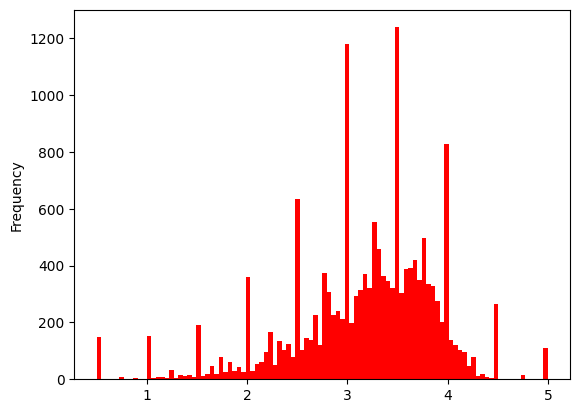

In [ ]:
ratings_mean_count_df['mean'].plot(bins=100, kind='hist',color='r')

<Axes: ylabel='Frequency'>

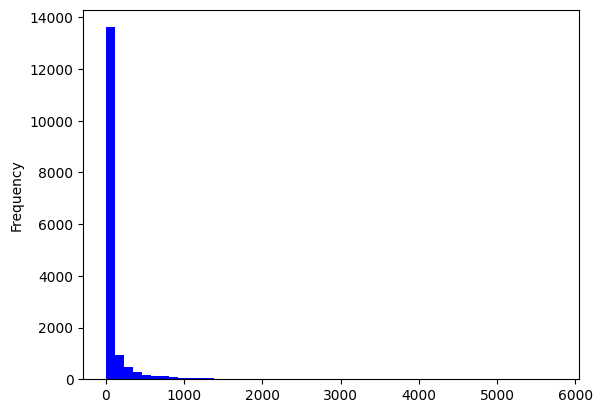

In [ ]:
ratings_mean_count_df['count'].plot(bins=50, kind='hist',color='b')

In [ ]:
ratings_mean_count_df[ratings_mean_count_df['mean']==5]

,count,mean
title,,
4:44 Last Day on Earth (2011),1.0,5.0
911 in Plane Site (2004),1.0,5.0
Abendland (2011),1.0,5.0
Absolute Giganten (1999),2.0,5.0
Adios Sabata (1970),1.0,5.0
...,...,...
"Very Potter Sequel, A (2010)",1.0,5.0
"Watch Out, We're Mad (...Altrimenti ci arrabbiamo!) (1974)",1.0,5.0
Watermark (2014),1.0,5.0


In [ ]:
ratings_mean_count_df.sort_values('count',ascending=False).head(400)

,count,mean
title,,
Pulp Fiction (1994),5759.0,4.162789
Forrest Gump (1994),5713.0,4.049624
"Silence of the Lambs, The (1991)",5348.0,4.193437
"Shawshank Redemption, The (1994)",5314.0,4.458035
Jurassic Park (1993),5141.0,3.670492
...,...,...
"Birds, The (1963)",983.0,3.736012
Goldfinger (1964),982.0,3.774440
A.I. Artificial Intelligence (2001),980.0,3.180102


In [ ]:
ratings_mean_count_df.sort_values('count',ascending=True).head(6000)

,count,mean
title,,
$ (Dollars) (1971),1.0,2.5
"Shrine, The (2010)",1.0,4.0
Shriek of the Mutilated (1974),1.0,2.5
Drummer-Crab (Le Crabe-Tambour) (1977),1.0,4.0
"Show of Force, A (1990)",1.0,4.5
...,...,...
Lord Love a Duck (1966),5.0,2.1
Me and Orson Welles (2008),5.0,3.2
Eye of the Tiger (1986),5.0,2.0


In [ ]:
movie_rating_df

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...
1728717,11680,120146,2.0,Boats (2013),Comedy
1728718,11680,121035,3.5,Houdini (2014),Drama
1728719,11699,97615,2.5,16 to Life (2009),Comedy|Drama
1728720,11699,99371,2.0,Camp Rock 2: The Final Jam (2010),Comedy|Musical|Romance


In [ ]:
filtered_df = ratings_mean_count_df[ratings_mean_count_df['count'] < 10]
filtered_df.reset_index()

,title,count,mean
0,$ (Dollars) (1971),1.0,2.500000
1,$5 a Day (2008),6.0,3.000000
2,$9.99 (2008),2.0,4.250000
3,'71 (2014),4.0,3.250000
4,'Hellboy': The Seeds of Creation (2004),4.0,3.125000
...,...,...,...
7903,[REC]³ 3 Génesis (2012),1.0,2.500000
7904,a/k/a Tommy Chong (2005),1.0,1.500000
7905,loudQUIETloud: A Film About the Pixies (2006),9.0,4.222222
7906,À l'aventure (2008),1.0,1.000000


In [ ]:
filtered_df = filtered_df.reset_index()
filtered_df
# Step 2: Extract the 'title' column
titles_to_remove = filtered_df['title']

# Step 3: Filter the movie_rating_df to remove rows with titles in titles_to_remove
filtered_movie_rating_df = movie_rating_df[~movie_rating_df['title'].isin(titles_to_remove)]

# # Display the filtered movie_rating_df
# print(filtered_movie_rating_df)

In [ ]:
filtered_movie_rating_df

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...
1725047,9197,8779,3.5,Bon Voyage (2003),Comedy|Drama
1725048,9335,8779,4.0,Bon Voyage (2003),Comedy|Drama
1725049,9364,8779,4.0,Bon Voyage (2003),Comedy|Drama
1725050,10759,8779,4.0,Bon Voyage (2003),Comedy|Drama


In [ ]:
userid_movietitle_matrix = filtered_movie_rating_df.pivot_table(index='userId',columns = 'title',values='rating')

In [ ]:
userid_movietitle_matrix

title,'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),...,"Zorro, the Gay Blade (1981)",Zulu (1964),[REC] (2007),[REC]² (2009),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11699,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11700,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic= userid_movietitle_matrix['Titanic (1997)']

In [ ]:
titanic_correlation =pd.DataFrame(userid_movietitle_matrix.corrwith(titanic),columns = ['correlation'])

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
titanic_correlation = titanic_correlation.join(ratings_mean_count_df['count'])

In [ ]:
titanic_correlation

,correlation,count
title,,
'Round Midnight (1986),0.792594,14.0
'Salem's Lot (2004),1.000000,11.0
'Til There Was You (1997),0.167211,59.0
"'burbs, The (1989)",-0.121260,288.0
'night Mother (1986),-0.263495,23.0
...,...,...
eXistenZ (1999),0.183032,471.0
xXx (2002),0.206611,369.0
xXx: State of the Union (2005),0.216642,64.0


In [ ]:
titanic_correlation.dropna(inplace=True)
titanic_correlation


,correlation,count
title,,
'Round Midnight (1986),0.792594,14.0
'Salem's Lot (2004),1.000000,11.0
'Til There Was You (1997),0.167211,59.0
"'burbs, The (1989)",-0.121260,288.0
'night Mother (1986),-0.263495,23.0
...,...,...
eXistenZ (1999),0.183032,471.0
xXx (2002),0.206611,369.0
xXx: State of the Union (2005),0.216642,64.0


In [ ]:
titanic_correlation.sort_values('correlation',ascending = False)

,correlation,count
title,,
Titanic (1997),1.0,2790.0
Dangerous Ground (1997),1.0,17.0
Ed's Next Move (1996),1.0,15.0
Rent-a-Kid (1995),1.0,20.0
'Salem's Lot (2004),1.0,11.0
...,...,...
Brother of Sleep (Schlafes Bruder) (1995),-1.0,12.0
"Sexual Life of the Belgians, The (Vie sexuelle des Belges 1950-1978, La) (1994)",-1.0,14.0
"Wooden Man's Bride, The (Yan shen) (1994)",-1.0,14.0


In [ ]:
titanic_correlation[titanic_correlation['count']>80].sort_values('correlation', ascending= False)

,correlation,count
title,,
Titanic (1997),1.000000,2790.0
Titanic (1953),0.672312,138.0
"Baby-Sitters Club, The (1995)",0.608705,87.0
"Swan Princess, The (1994)",0.601361,104.0
Mad Love (1995),0.538524,118.0
...,...,...
Casino Royale (1967),-0.290278,92.0
"Great White Hype, The (1996)",-0.290829,128.0
Machete (2010),-0.298214,92.0


In [ ]:
movie_correlation = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)

In [ ]:
movie_correlation

title,'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),...,"Zorro, the Gay Blade (1981)",Zulu (1964),[REC] (2007),[REC]² (2009),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383202,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.056666,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.056666,1.000000,NaN,NaN,NaN
xXx: State of the Union (2005),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
myRatings = pd.read_csv('/content/myRating.csv')

In [ ]:
myRatings


,Movie Name,Ratings
0,Titanic (1997),5
1,'night Mother (1986),1


In [ ]:
myRatings['Movie Name'][0]

'Titanic (1997)'

In [ ]:
# Initialize an empty list to accumulate results
similar_movie_list = []

# Loop through the first two rated movies
for i in range(0, 2):
    # Get the correlation series for the movie
    similar_movie = movie_correlation[myRatings['Movie Name'][i]].dropna()
    # Scale the similarity by the rating
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i])
    # Append the scaled similarity series to the list
    similar_movie_list.append(similar_movie)

# Concatenate all similarity series into one
similar_movie_list = pd.concat(similar_movie_list)

# Optionally, you can sum up the values for each movie to get the total score
similar_movie_list = similar_movie_list.groupby(similar_movie_list.index).sum()

# Sort the movies by their similarity scores in descending order
similar_movie_list = similar_movie_list.sort_values(ascending=False)

# Optionally, drop movies that you have already rated
rated_movies = myRatings['Movie Name'].values
similar_movie_list = similar_movie_list.drop(rated_movies, errors='ignore')

# Display the final similar movie list
print(similar_movie_list)


title
Ghost (1990)                 2.462544
My Girl (1991)               2.403919
Autumn in New York (2000)    2.400841
Pearl Harbor (2001)          2.331620
Bodyguard, The (1992)        2.326585
                               ...   
Strange Brew (1983)         -0.995396
Sexy Beast (2000)           -1.031069
Night on Earth (1991)       -1.222691
Vampires (1998)             -1.296728
Bob Roberts (1992)          -1.427353
Length: 2353, dtype: float64
